### 2. Do critic score and users score related to each other? Which region of sales have the most contribution for global sales?

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import *
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from scipy.stats import norm, skew 

#### Data cleaning and transfer data type

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df = df.dropna(how='any',axis=0)

In [4]:
df['User_Score'] =pd.to_numeric(df['User_Score'])  # convert user score from string to numeric data

In [5]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


#### Correlation map

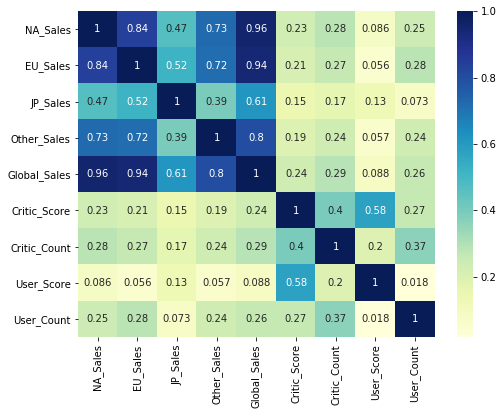

In [6]:
# plot a correlation map 
plt.figure(figsize=(8, 6))
vg_corr = df.drop('Year_of_Release',axis=1).corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True,
            cmap='YlGnBu')

#### Crossplot

<Figure size 1008x1008 with 0 Axes>

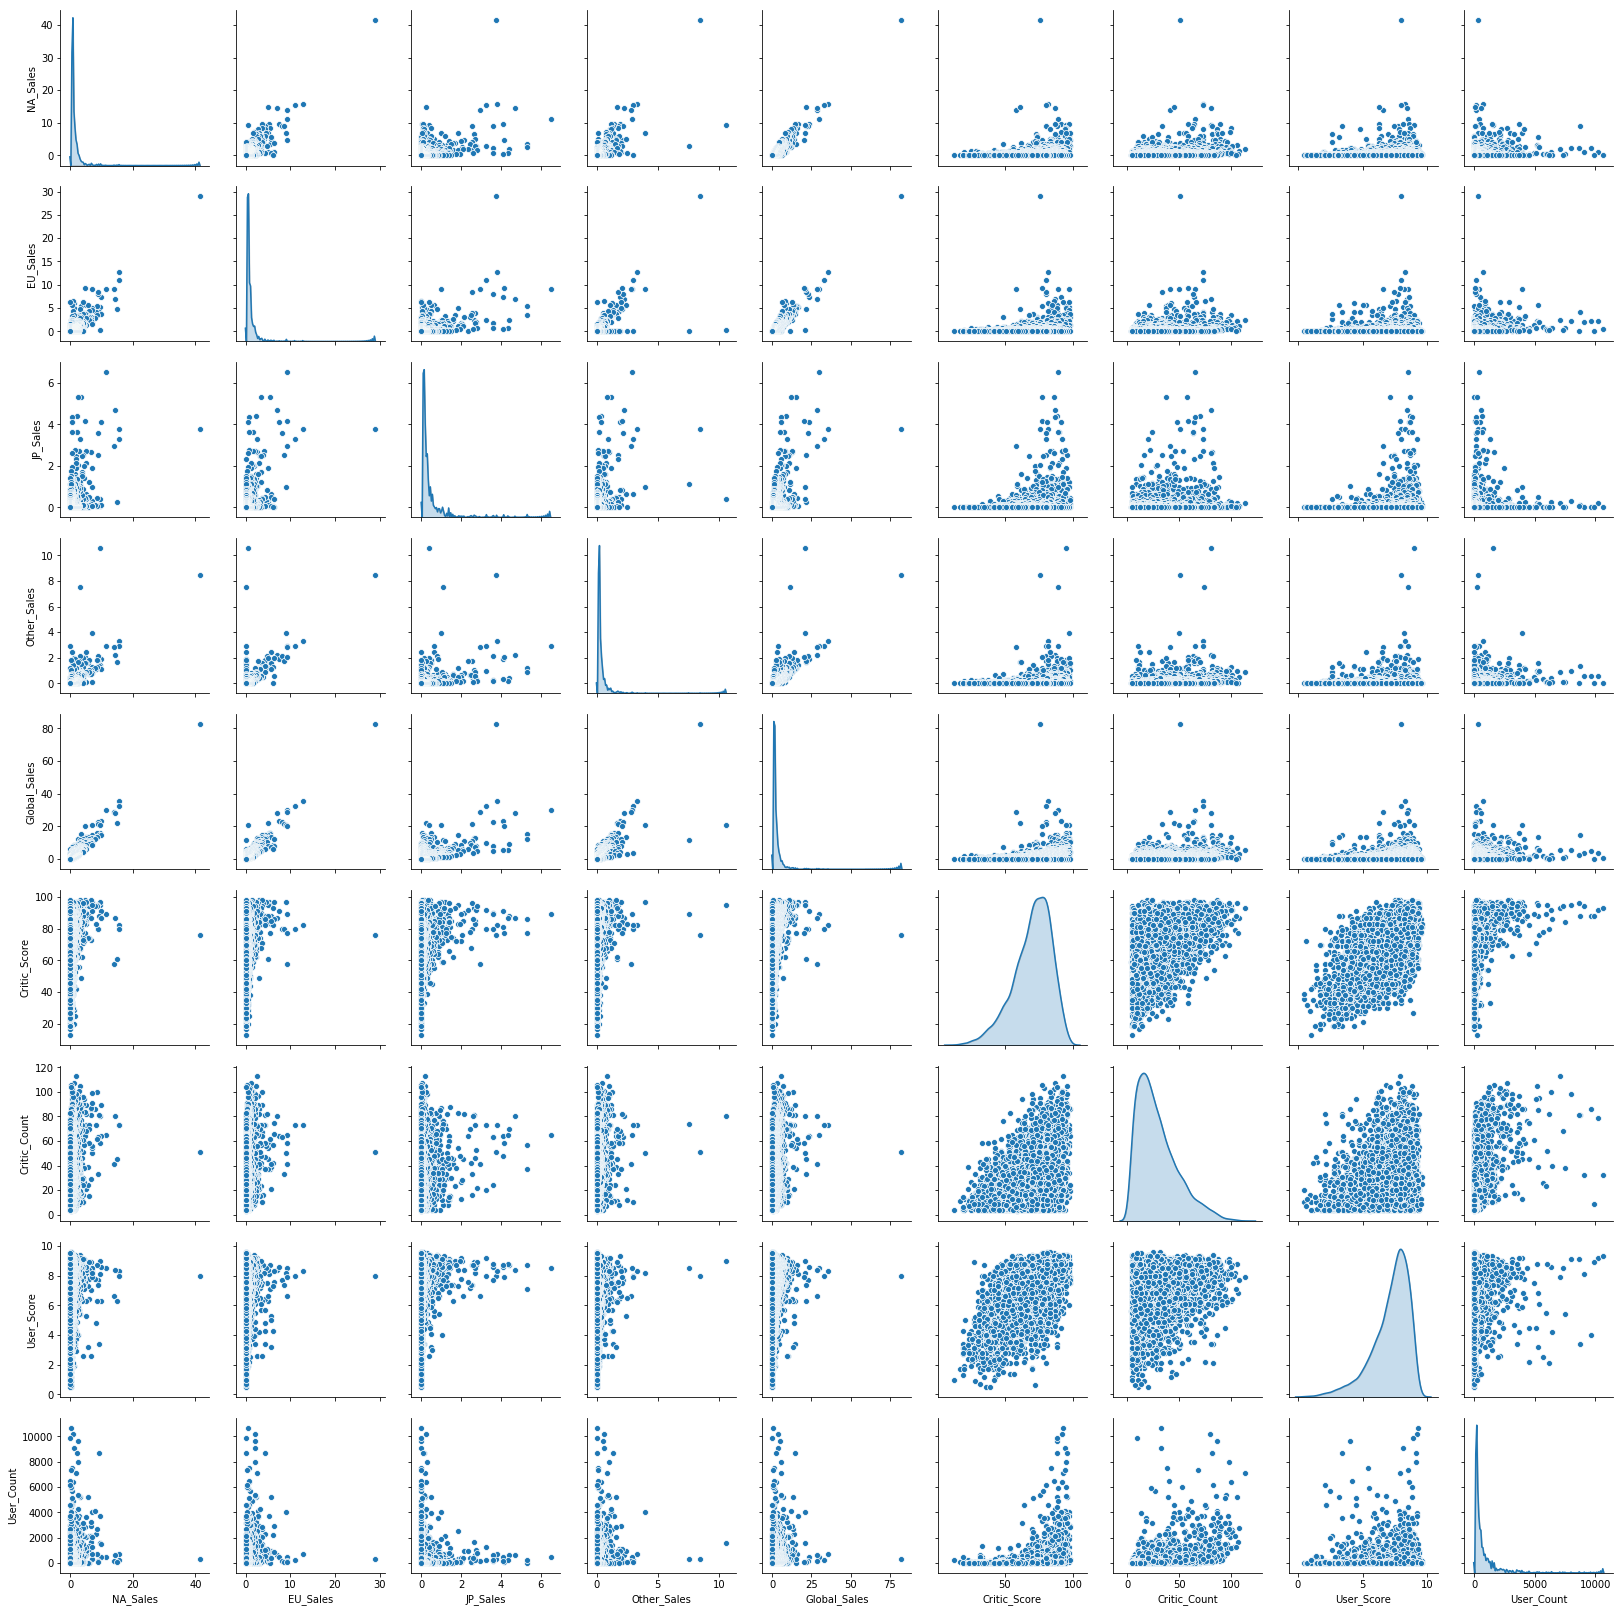

In [7]:
plt.figure(figsize=(14, 14))
sns.pairplot(df.drop('Year_of_Release',axis=1), diag_kind='kde');

#### Prepare X and y for dataset, make distribution plot and probability plot to confirm whether the data are normal distribution.

In [8]:
X = np.array(df['Critic_Score']).reshape(-1, 1)
y = np.array(df['User_Score'])


 mu = 7.19 and sigma = 1.44



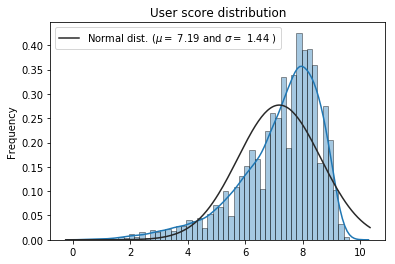

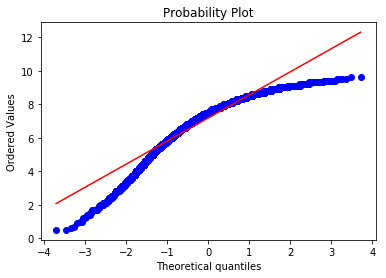

In [9]:
sns.distplot(y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('User score distribution')

fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()


 mu = 207.02 and sigma = 143.92



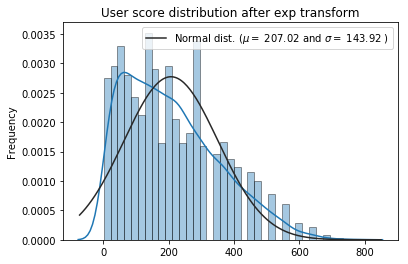

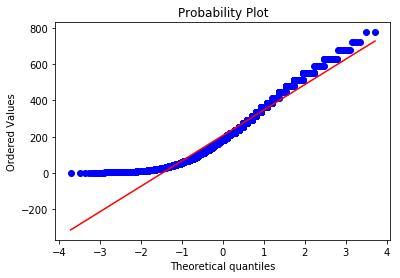

In [24]:
# We use the numpy fuction np.exp2 which  applies log(1+x) to all elements of the column, try to transfer 
# left skew to normal distribution.
Y_exp_transformed = np.exp2(y) 

#Check the new distribution 
sns.distplot(Y_exp_transformed , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y_exp_transformed)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('User score distribution after exp transform')

#Get also the QQ-plot
Y_exp_transformed = np.exp2(y) 
fig = plt.figure()
res = stats.probplot(Y_exp_transformed, plot=plt)
plt.show()


 mu = 70.27 and sigma = 13.87



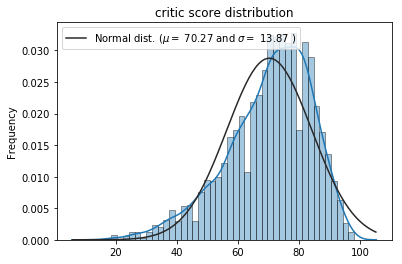

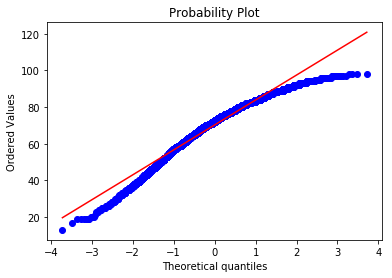

In [11]:
# the distribution for critic score
X_fig = np.array(df['Critic_Score'])

sns.distplot(X_fig, fit=norm);

# Get the fitted parameters used by the function
(mux, sigmax) = norm.fit(X_fig)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mux, sigmax))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mux, sigmax)],
            loc='best')
plt.ylabel('Frequency')
plt.title('critic score distribution')

fig = plt.figure()
resx = stats.probplot(X_fig, plot=plt)
plt.show()

#### Plot the scatter and regression line between critic score and user score

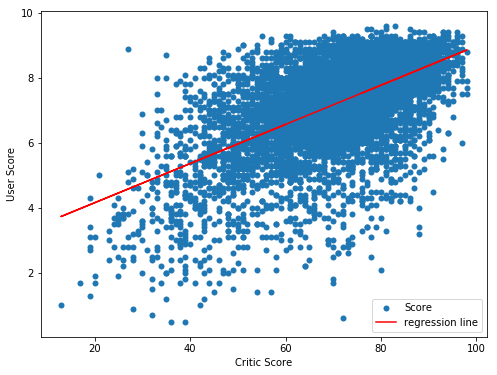

In [12]:
rgr = linear_model.LinearRegression(fit_intercept = True) # apply linear regression model 
rgr.fit (X,y)
y_pred = rgr.predict(X) # make prediction

plt.figure(figsize=(8, 6))
p1 = plt.scatter(X,y,linewidths=0.01)
p2, = plt.plot(X,y_pred,color = 'r')
plt.ylabel('User Score')
plt.xlabel('Critic Score')
plt.legend([p1,p2],['Score','regression line'])

#### Plot the scatter of predict user score and true user score. 

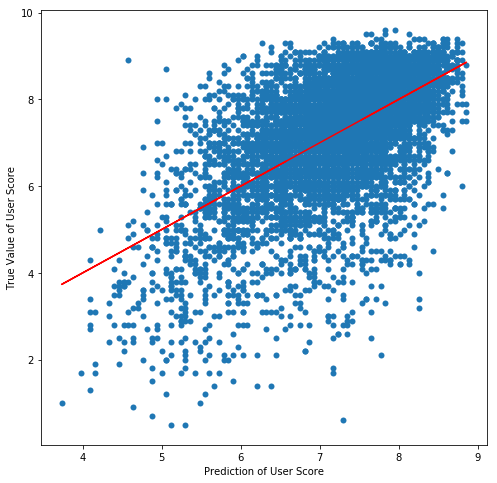

In [13]:
plt.figure(figsize=(8, 8))

plt.scatter(y_pred,y,linewidth = 0.001)
plt.ylabel('True Value of User Score')
plt.xlabel('Prediction of User Score')
plt.plot(y_pred,y_pred,color = 'red')

#### Calculate r2 score, slope and intercept for regression line

In [15]:
print('R^2 : %.4f'%rgr.score(X,y))
print('slope : %.4f'%rgr.coef_)
print('intercept : %.4f'%rgr.intercept_)

R^2 : 0.3368
slope : 0.0603
intercept : 2.9515


#### Plot the residual of regression line

In [16]:
# define a function that calculate resudual and make residual plot
def residual_plot(y_pred, y,x):
    residual = y - y_pred
    xlims = np.linspace(min(x), max(x),len(x))
    x0 = np.zeros(len(x))
    plt.figure(figsize=(8, 6))
    p1 = plt.scatter(x,residual,linewidths=0.01)
    p2, = plt.plot(xlims,x0,color = 'r')
    plt.ylabel('Residual')
    plt.xlabel('Critic score')
    plt.legend([p1,p2],['residual','regression line'])

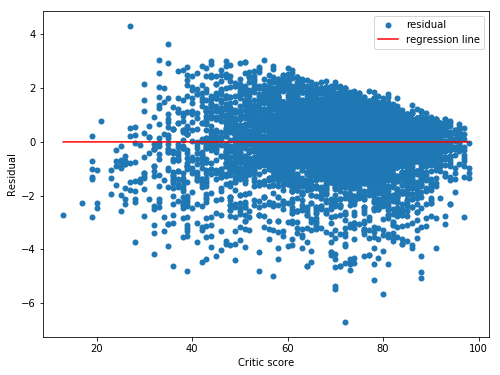

In [17]:
residual_plot(y_pred, y, X)

#### Use bootstrapping method to find the confidence interval of slope. 

In [18]:
X_b = np.array(df['Critic_Score'])
bootstrap = Table().with_columns('x', X_b, 'y', y)

In [21]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def bootstrap_slope( table, x, y, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the list of generated slopes
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)


Slope of regression line: 0.06025310887306361
Approximate 95%-confidence interval for the true slope:
0.05793645702329859 0.062485584526137145


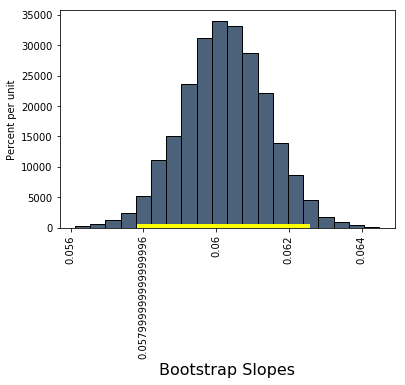

In [22]:
bootstrap_slope( bootstrap, 'x', 'y', 5000)

#### Calculate r2 score, slope and intercept for regression line that user score have been transfered by np.exp2 function.

In [23]:
rgr.fit (X,Y_log_transformed)
print('R^2 : %.4f'%rgr.score(X,Y_log_transformed))
print('slope : %.4f'%rgr.coef_)
print('intercept : %.4f'%rgr.intercept_)

R^2 : 0.2648
slope : 5.3411
intercept : -168.3126


The r2 score based on transferred user score is lower than original score, we will use original user score. 